In [1]:
import os
import glob

import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt

import invisible_cities.database.load_db as DB

In [2]:
%matplotlib inline

plt.rcParams["figure.figsize"] = 12, 8

In [4]:
filenames = glob.glob(os.path.expandvars("$IC_DATA/MC/Kr/preprod_201710/*"))
DataSiPM  = DB.DataSiPM(-4715)
blines    = DB.SiPMNoise(4715)[-1]

In [5]:
true_pdf = pd.read_csv("/Users/Gonzalo/SiPMnoisePDF_4714.csv", sep=", ")

/Applications/anaconda3/envs/IC3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


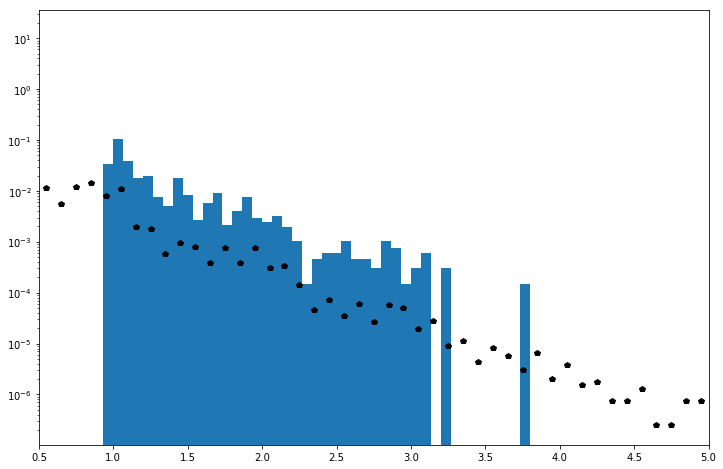

In [55]:
eps = 1e-20
for filename in filenames:
    with tb.open_file(filename) as f:
        rwf = f.root.RD.sipmrwf[:1000, :, :100]
        sipms  = np.concatenate(rwf, axis=1)
#        bline  = sipms.mean(axis=1)
#        sipms  = sipms - bline[:, np.newaxis]
        sipms  = sipms / (DataSiPM.adc_to_pes.values[:, np.newaxis] + eps)
        for i in range(105, 106):
            sipm = sipms[i]
#            print(bline[i], blines[i])
            pdf  = true_pdf[true_pdf.SensorID == DataSiPM.SensorID.values[i]]
            plt.hist(sipm, np.linspace(-5, 15, 301), normed=True)
            plt.yscale("log")
            plt.errorbar(pdf.BinEnergyPes, pdf.Probability, fmt="kp")
            plt.xlim(.5, 5)
            break
    break

In [6]:
f = tb.open_file(filenames[0])
rwf = f.root.RD.sipmrwf[:, :, :100]
f.close()

In [7]:
sipms_adc = np.concatenate(rwf, axis=1)
sipms_pes = sipms_adc / (DataSiPM.adc_to_pes.values[:, np.newaxis] + 1e-20)

In [8]:
i = 219
s = DataSiPM.SensorID.values[i]
pdf = true_pdf[true_pdf.SensorID == s]

(0.5, 5)

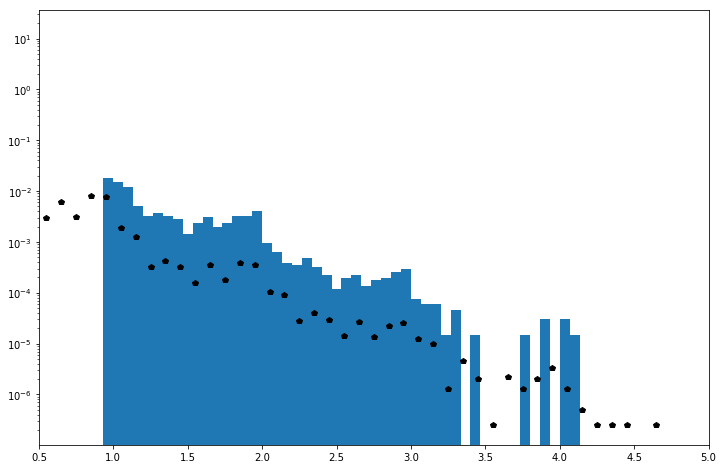

In [9]:
plt.hist(sipms_pes[i], np.linspace(-5, 15, 301), normed=True)
plt.yscale("log")
plt.errorbar(pdf.BinEnergyPes, pdf.Probability, fmt="kp")
plt.xlim(.5, 5)